In [2]:
%store -r matches_df
%store -r number_of_players_in_pool
%store -r totalPlayers

In [10]:
matches_df_all = {}

import os
import json
import numpy as np

file_path = "matches_df_all.json"

if os.path.exists(file_path):
    with open(file_path, "r") as file:
        try:
            matches_df_all = json.load(file)
        except json.decoder.JSONDecodeError:
            print("Error: The file does not contain valid JSON data.")
            matches_df_all = {}

# Below line is to reset all values in matches_df_all, uncomment it only when you want to reset data
# matches_df_all = {}

matches_df_all.setdefault('Pool', []).append(matches_df['Match Number'].iloc[-1])
matches_df_all.setdefault('Total Amount Earned by App', []).append(round(matches_df['Total Amount Earned by App'].iloc[-1], 2))

for i in range(number_of_players_in_pool):
    players = list(totalPlayers.keys())
    
players = players + ['Total Amount Earned by App']
total_money_involved = round(matches_df[players].iloc[-1].sum(), 2)
only_players = players.copy()
del only_players[-1]
  
matches_df_all.setdefault('Total Money Involved in the Pool', []).append(total_money_involved)

sorted_values = matches_df[only_players].iloc[-1].sort_values()
renamed_columns = [f"P_{i}" for i in range(1, len(only_players) + 1)]
matches_df.rename(columns=dict(zip(only_players, renamed_columns)), inplace=True)

for col in only_players:
    matches_df_all.setdefault(f"P_{only_players.index(col) + 1}", []).append(sorted_values[col])

# Convert int64 values to regular Python integers
def convert_to_json_serializable(obj):
    if isinstance(obj, np.int64):
        return int(obj)
    return obj

with open(file_path, "w") as file:
    json.dump(matches_df_all, file, default=convert_to_json_serializable)

In [12]:
import pandas as pd
matches_df_all_df = pd.DataFrame(matches_df_all)

In [13]:
matches_df_all_df

,Pool,Total Amount Earned by App,Total Money Involved in the Pool,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10
0,300,93.76,174.14,3.304,0.786,3.103,55.076,3.587,0.967,4.693,2.444,2.721,3.702
1,465,138.99,185.95,0.753,23.636,2.058,7.424,1.520,2.795,2.109,2.883,1.625,2.154
2,507,152.56,227.96,45.337,3.981,0.931,3.884,4.335,3.027,3.064,3.588,3.471,3.785
3,221,67.10,127.36,2.732,2.603,3.030,3.684,32.023,2.212,1.929,2.778,6.295,2.974
4,342,107.33,177.22,3.729,2.246,40.618,3.577,1.102,3.499,6.566,2.084,3.493,2.978
5,201,62.50,145.06,57.231,3.163,3.605,3.179,4.063,3.786,0.859,2.836,2.578,1.259
6,484,146.99,190.61,3.208,3.003,2.784,3.299,3.974,14.762,2.680,5.217,3.112,1.579
7,334,101.88,184.85,2.944,5.075,3.975,54.116,2.934,2.700,3.591,3.129,2.442,2.064
8,456,143.78,211.74,2.066,3.963,3.017,3.757,2.784,1.328,3.833,36.148,7.140,3.925
9,385,119.78,185.11,38.231,2.454,5.117,3.774,2.960,2.711,1.638,3.788,3.562,1.092


In [14]:
matches_df_all_df.to_excel('Support_File_Rummy_10_0.05.xlsx', index=False, engine='openpyxl')

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 5000x4000 with 0 Axes>

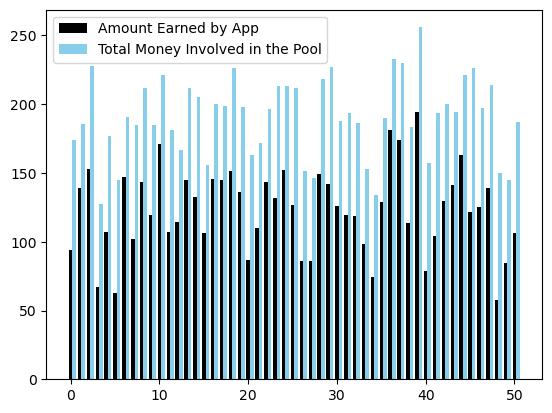

In [46]:
plt.figure(figsize=(50,40))
fig, ax = plt.subplots()
ax.bar(matches_df_all_df['Total Amount Earned by App'].index, matches_df_all_df['Total Amount Earned by App'], width=0.4, align='center', label='Amount Earned by App', color='black')
ax.bar(matches_df_all_df['Total Money Involved in the Pool'].index + 0.4, matches_df_all_df['Total Money Involved in the Pool'], width=0.4, align='center', label='Total Money Involved in the Pool', color='skyblue')
ax.legend()
plt.show()

In [47]:
matches_df_all_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pool,51.0,406.843137,102.858227,196.000,340.5000,412.000,481.5000,637.000
Total Amount Earned by App,51.0,123.170000,30.775938,57.400,105.2450,125.870,144.3150,194.210
Total Money Involved in the Pool,51.0,190.647647,28.913821,127.360,172.9900,193.370,212.5800,255.960
P_1,51.0,8.449510,14.126305,0.374,2.7395,3.304,3.9570,57.231
P_2,51.0,7.609000,12.607330,0.786,2.6055,3.443,3.9605,59.555
P_3,51.0,5.322333,10.114066,0.335,1.9925,3.103,3.7850,55.634
P_4,51.0,7.836843,15.283263,0.533,2.4615,3.299,3.8835,77.341
P_5,51.0,6.075255,9.043520,0.798,2.5915,3.374,4.1035,40.069
P_6,51.0,7.153725,11.940620,0.967,2.5120,2.830,4.4805,49.842
P_7,51.0,5.404078,9.188238,0.751,2.5775,3.189,3.9155,52.696


In [52]:
App = matches_df_all_df['Total Amount Earned by App'].sum()

In [53]:
Pooll = matches_df_all_df['Total Money Involved in the Pool'].sum()

In [60]:
Percent_of_money_gone_to_the_app = App/Pooll*100

In [61]:
Percent_of_money_gone_to_the_app

64.60609501359144

In [66]:
comparison = pd.DataFrame(matches_df_all_df[['Total Amount Earned by App','Total Money Involved in the Pool']])

In [68]:
comparison.head()

,Total Amount Earned by App,Total Money Involved in the Pool
0,93.76,174.14
1,138.99,185.95
2,152.56,227.96
3,67.10,127.36
4,107.33,177.22


In [72]:
comparison['Percent_Share'] = matches_df_all_df['Total Amount Earned by App']/matches_df_all_df['Total Money Involved in the Pool']*100

In [73]:
comparison

,Total Amount Earned by App,Total Money Involved in the Pool,Percent_Share
0,93.76,174.14,53.841737
1,138.99,185.95,74.745899
2,152.56,227.96,66.924022
3,67.10,127.36,52.685302
4,107.33,177.22,60.563142
5,62.50,145.06,43.085620
6,146.99,190.61,77.115576
7,101.88,184.85,55.114958
8,143.78,211.74,67.904033
9,119.78,185.11,64.707471


In [75]:
comparison.Percent_Share.sum()/51

63.81914868772557

In [77]:
comparison.corr()

,Total Amount Earned by App,Total Money Involved in the Pool,Percent_Share
Total Amount Earned by App,1.000000,0.908183,0.877920
Total Money Involved in the Pool,0.908183,1.000000,0.608759
Percent_Share,0.877920,0.608759,1.000000


<Axes: >

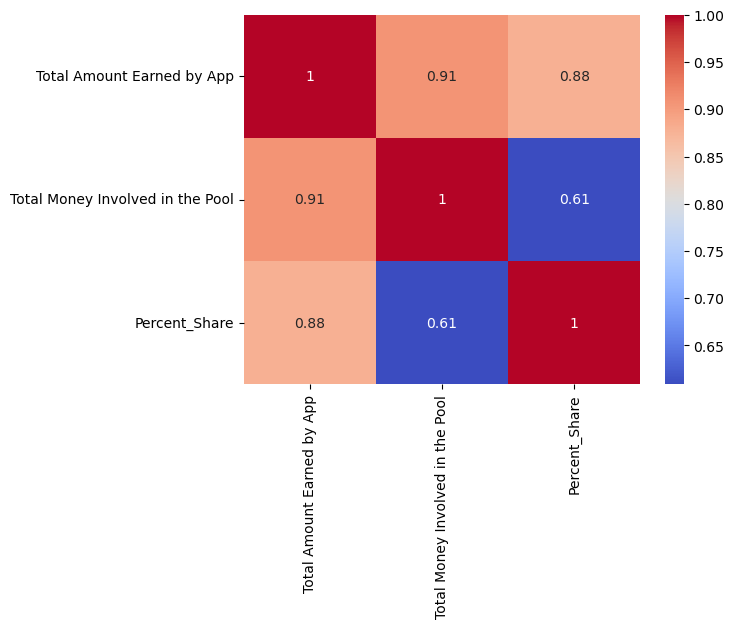

In [81]:
sns.heatmap(comparison.corr(numeric_only=True), annot=True, cmap='coolwarm')